In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
df_southAsianChurn = pd.read_csv('South Asian Wireless Telecom Operator (SATO 2015).csv')
df_southAsianChurn.head()

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_Calls,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count,aug_user_type,sep_user_type,aug_fav_a,sep_fav_a,Class
0,1914,1592.7200,23.26,2.5,1.161130e+01,375,25523,99000,1,2G,2G,telenor,mobilink,Churned
1,2073,1404.1496,174.45,27.5,2.531725e+03,389,14584,77299,1,2G,2G,mobilink,ufone,Churned
2,3139,85.5504,14.34,5.0,2.913306e+04,15,477,4194,1,Other,Other,ptcl,telenor,Churned
3,139,2315.2292,19.25,52.5,2.674413e+05,636,50316,52400,2,2G,2G,telenor,ufone,Active
4,139,227.8620,2.95,42.5,1.461621e+06,17,2568,1701,1,NaN,NaN,mobilink,ufone,Active


In [3]:
df_southAsianChurn.tail()

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_Calls,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count,aug_user_type,sep_user_type,aug_fav_a,sep_fav_a,Class
1995,3085,884.970,0.01,0.0,2.103931e+06,439,0,358,1,3G,3G,ptcl,ufone,Active
1996,1779,1219.900,21.98,180.0,4.179692e+06,19,1908,4456,2,3G,3G,ptcl,ptcl,Churned
1997,2774,652.630,4.14,57.5,2.166006e+06,526,741,716,1,3G,3G,warid,ufone,Active
1998,2796,1179.390,2.35,72.5,1.974496e+07,191,8928,36879,2,3G,3G,zong,ufone,Active
1999,2802,665.318,18.48,2.5,1.825127e+06,174,477,6679,1,3G,3G,mobilink,ptcl,Churned


In [4]:
df_southAsianChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   network_age                2000 non-null   int64  
 1   Aggregate_Total_Rev        2000 non-null   float64
 2   Aggregate_SMS_Rev          2000 non-null   float64
 3   Aggregate_Data_Rev         2000 non-null   float64
 4   Aggregate_Data_Vol         2000 non-null   float64
 5   Aggregate_Calls            2000 non-null   int64  
 6   Aggregate_ONNET_REV        2000 non-null   int64  
 7   Aggregate_OFFNET_REV       2000 non-null   int64  
 8   Aggregate_complaint_count  2000 non-null   int64  
 9   aug_user_type              1755 non-null   object 
 10  sep_user_type              1794 non-null   object 
 11  aug_fav_a                  1999 non-null   object 
 12  sep_fav_a                  1999 non-null   object 
 13  Class                      2000 non-null   objec

In [5]:
df_southAsianChurn.count

<bound method DataFrame.count of       network_age  Aggregate_Total_Rev  Aggregate_SMS_Rev  Aggregate_Data_Rev  \
0            1914            1592.7200              23.26                 2.5   
1            2073            1404.1496             174.45                27.5   
2            3139              85.5504              14.34                 5.0   
3             139            2315.2292              19.25                52.5   
4             139             227.8620               2.95                42.5   
...           ...                  ...                ...                 ...   
1995         3085             884.9700               0.01                 0.0   
1996         1779            1219.9000              21.98               180.0   
1997         2774             652.6300               4.14                57.5   
1998         2796            1179.3900               2.35                72.5   
1999         2802             665.3180              18.48                 2.

In [6]:
df_southAsianChurn.dtypes

network_age                    int64
Aggregate_Total_Rev          float64
Aggregate_SMS_Rev            float64
Aggregate_Data_Rev           float64
Aggregate_Data_Vol           float64
Aggregate_Calls                int64
Aggregate_ONNET_REV            int64
Aggregate_OFFNET_REV           int64
Aggregate_complaint_count      int64
aug_user_type                 object
sep_user_type                 object
aug_fav_a                     object
sep_fav_a                     object
Class                         object
dtype: object

In [7]:
df_southAsianChurn.columns

Index(['network_age', 'Aggregate_Total_Rev', 'Aggregate_SMS_Rev',
       'Aggregate_Data_Rev', 'Aggregate_Data_Vol', 'Aggregate_Calls',
       'Aggregate_ONNET_REV', 'Aggregate_OFFNET_REV',
       'Aggregate_complaint_count', 'aug_user_type', 'sep_user_type',
       'aug_fav_a', 'sep_fav_a', 'Class'],
      dtype='object')

In [8]:
df_southAsianChurn.shape

(2000, 14)

In [9]:
df_southAsianChurn.nunique()

network_age                  1364
Aggregate_Total_Rev          1982
Aggregate_SMS_Rev             998
Aggregate_Data_Rev            307
Aggregate_Data_Vol           1990
Aggregate_Calls               666
Aggregate_ONNET_REV          1194
Aggregate_OFFNET_REV         1614
Aggregate_complaint_count      20
aug_user_type                   3
sep_user_type                   3
aug_fav_a                       7
sep_fav_a                       6
Class                           2
dtype: int64

In [10]:
df_southAsianChurn.describe()

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_Calls,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000
mean,1469.554500,905.020106,31.108605,58.806080,2.773961e+06,240.910500,7411.284500,16457.577500,1.924500
std,1286.753291,1151.308507,57.908418,247.459279,8.845272e+06,369.922258,16494.392836,34311.972061,2.265693
min,-8.000000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.000000,1.000000
25%,323.500000,247.149600,3.500000,1.250000,2.675567e+03,25.000000,114.000000,1432.000000,1.000000
50%,1194.500000,606.575000,14.810000,13.750000,1.822864e+05,99.000000,1940.500000,5039.000000,1.000000
75%,2247.250000,1220.045000,34.140000,53.750000,1.544505e+06,331.250000,7941.000000,15790.000000,2.000000
max,5451.000000,24438.830000,873.980000,8295.000000,1.550312e+08,5727.000000,381174.000000,431440.000000,49.000000


In [11]:
df_southAsianChurn=df_southAsianChurn.drop_duplicates(keep='first')
df_southAsianChurn

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_Calls,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count,aug_user_type,sep_user_type,aug_fav_a,sep_fav_a,Class
0,1914,1592.7200,23.26,2.5,1.161130e+01,375,25523,99000,1,2G,2G,telenor,mobilink,Churned
1,2073,1404.1496,174.45,27.5,2.531725e+03,389,14584,77299,1,2G,2G,mobilink,ufone,Churned
2,3139,85.5504,14.34,5.0,2.913306e+04,15,477,4194,1,Other,Other,ptcl,telenor,Churned
3,139,2315.2292,19.25,52.5,2.674413e+05,636,50316,52400,2,2G,2G,telenor,ufone,Active
4,139,227.8620,2.95,42.5,1.461621e+06,17,2568,1701,1,NaN,NaN,mobilink,ufone,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3085,884.9700,0.01,0.0,2.103931e+06,439,0,358,1,3G,3G,ptcl,ufone,Active
1996,1779,1219.9000,21.98,180.0,4.179692e+06,19,1908,4456,2,3G,3G,ptcl,ptcl,Churned
1997,2774,652.6300,4.14,57.5,2.166006e+06,526,741,716,1,3G,3G,warid,ufone,Active
1998,2796,1179.3900,2.35,72.5,1.974496e+07,191,8928,36879,2,3G,3G,zong,ufone,Active


In [12]:
df_southAsianChurn = df_southAsianChurn.sort_values(by='network_age', ascending=True)
df_southAsianChurn

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_Calls,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count,aug_user_type,sep_user_type,aug_fav_a,sep_fav_a,Class
594,-8,485.7008,21.34,0.00,2.327901e+06,607,0,179,1,Other,Other,telenor,ufone,Churned
595,-5,857.1008,63.47,190.03,1.565901e+06,204,716,1240,1,3G,3G,telenor,telenor,Churned
596,-4,2898.8240,25.10,1.25,3.058533e+05,642,0,82221,1,3G,3G,mobilink,warid,Churned
597,-3,307.1204,6.25,75.00,3.450763e+05,9,477,1284,3,3G,3G,zong,ufone,Churned
598,-2,130.5780,94.85,1.25,2.195300e+00,7,150,1121,1,Other,Other,ufone,ufone,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,5356,1424.1700,105.77,192.50,9.054108e+04,52,17843,6083,1,3G,3G,telenor,ufone,Active
592,5363,922.7180,11.23,32.50,1.838702e+06,929,0,0,3,NaN,NaN,zong,ufone,Active
591,5363,1321.3504,0.00,0.00,6.373896e+02,1514,239,0,1,Other,Other,ptcl,ufone,Active
111,5374,1008.5800,0.00,0.00,5.256497e+05,682,0,4425,3,3G,3G,mobilink,ufone,Active


array([[<AxesSubplot:title={'center':'network_age'}>,
        <AxesSubplot:title={'center':'Aggregate_Total_Rev'}>,
        <AxesSubplot:title={'center':'Aggregate_SMS_Rev'}>],
       [<AxesSubplot:title={'center':'Aggregate_Data_Rev'}>,
        <AxesSubplot:title={'center':'Aggregate_Data_Vol'}>,
        <AxesSubplot:title={'center':'Aggregate_Calls'}>],
       [<AxesSubplot:title={'center':'Aggregate_ONNET_REV'}>,
        <AxesSubplot:title={'center':'Aggregate_OFFNET_REV'}>,
        <AxesSubplot:title={'center':'Aggregate_complaint_count'}>]],
      dtype=object)

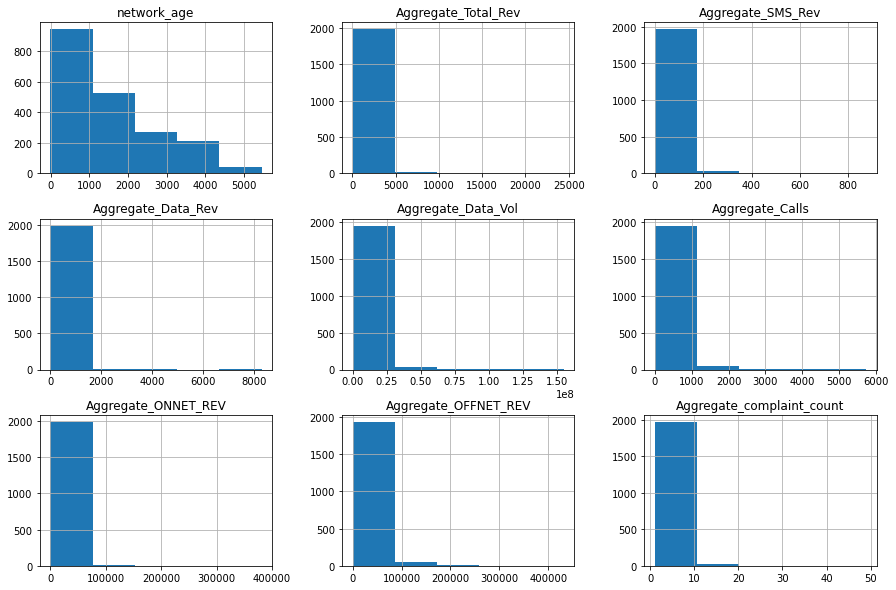

In [13]:
# Histogram
df_southAsianChurn.hist(bins=5, figsize=(15,10))

C:\Users\shrut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='network_age', ylabel='Density'>

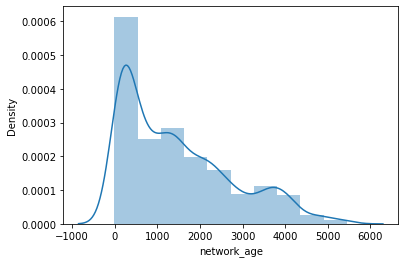

In [14]:
sns.distplot(df_southAsianChurn['network_age'], bins=10)

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_Calls,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count
network_age,1.000000,0.170512,-0.054202,0.029954,-0.013904,0.218089,0.016940,0.099488,0.060458
Aggregate_Total_Rev,0.170512,1.000000,0.343828,0.616206,0.130510,0.541560,0.430127,0.716676,0.088498
Aggregate_SMS_Rev,-0.054202,0.343828,1.000000,0.313534,-0.052676,0.046630,0.167388,0.255512,0.000535
Aggregate_Data_Rev,0.029954,0.616206,0.313534,1.000000,0.092990,0.057127,0.139449,0.275433,0.062376
Aggregate_Data_Vol,-0.013904,0.130510,-0.052676,0.092990,1.000000,-0.012598,-0.046498,-0.006910,0.024813
Aggregate_Calls,0.218089,0.541560,0.046630,0.057127,-0.012598,1.000000,0.256211,0.438158,0.085633
Aggregate_ONNET_REV,0.016940,0.430127,0.167388,0.139449,-0.046498,0.256211,1.000000,0.449966,0.033629
Aggregate_OFFNET_REV,0.099488,0.716676,0.255512,0.275433,-0.006910,0.438158,0.449966,1.000000,0.045458
Aggregate_complaint_count,0.060458,0.088498,0.000535,0.062376,0.024813,0.085633,0.033629,0.045458,1.000000


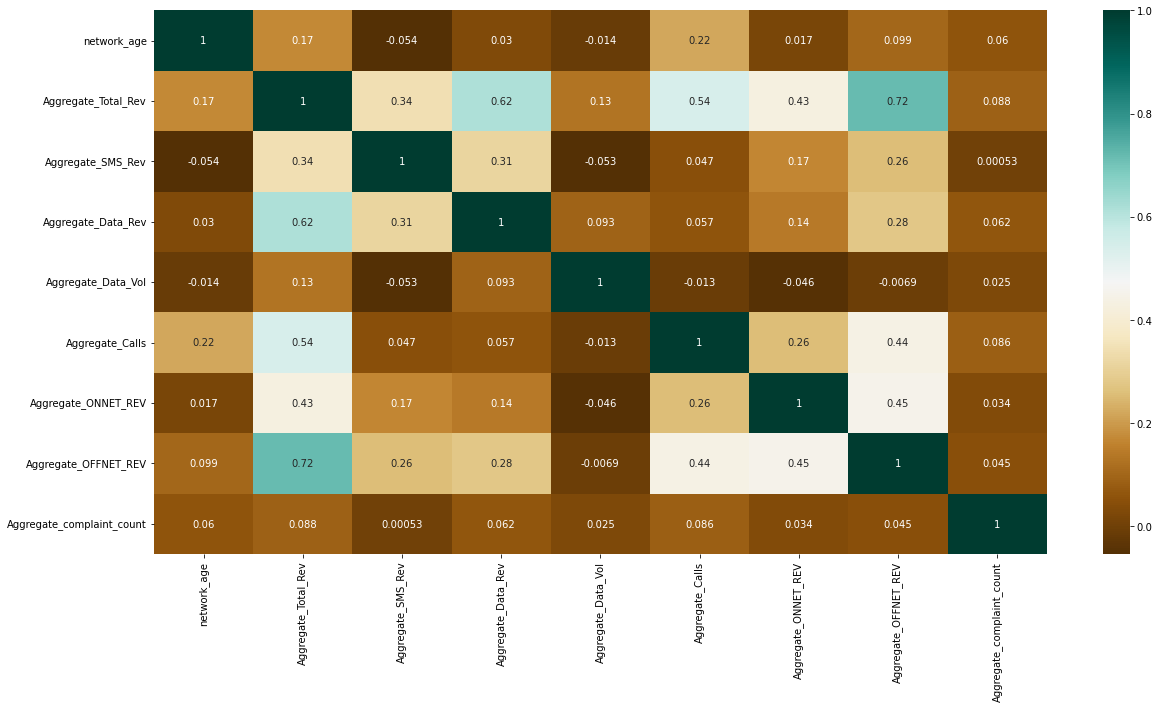

In [15]:
# Finding the relations between the variables using heatmap.
plt.figure(figsize=(20,10))
hmap= df_southAsianChurn.corr()
sns.heatmap(hmap,cmap="BrBG",annot=True)
hmap

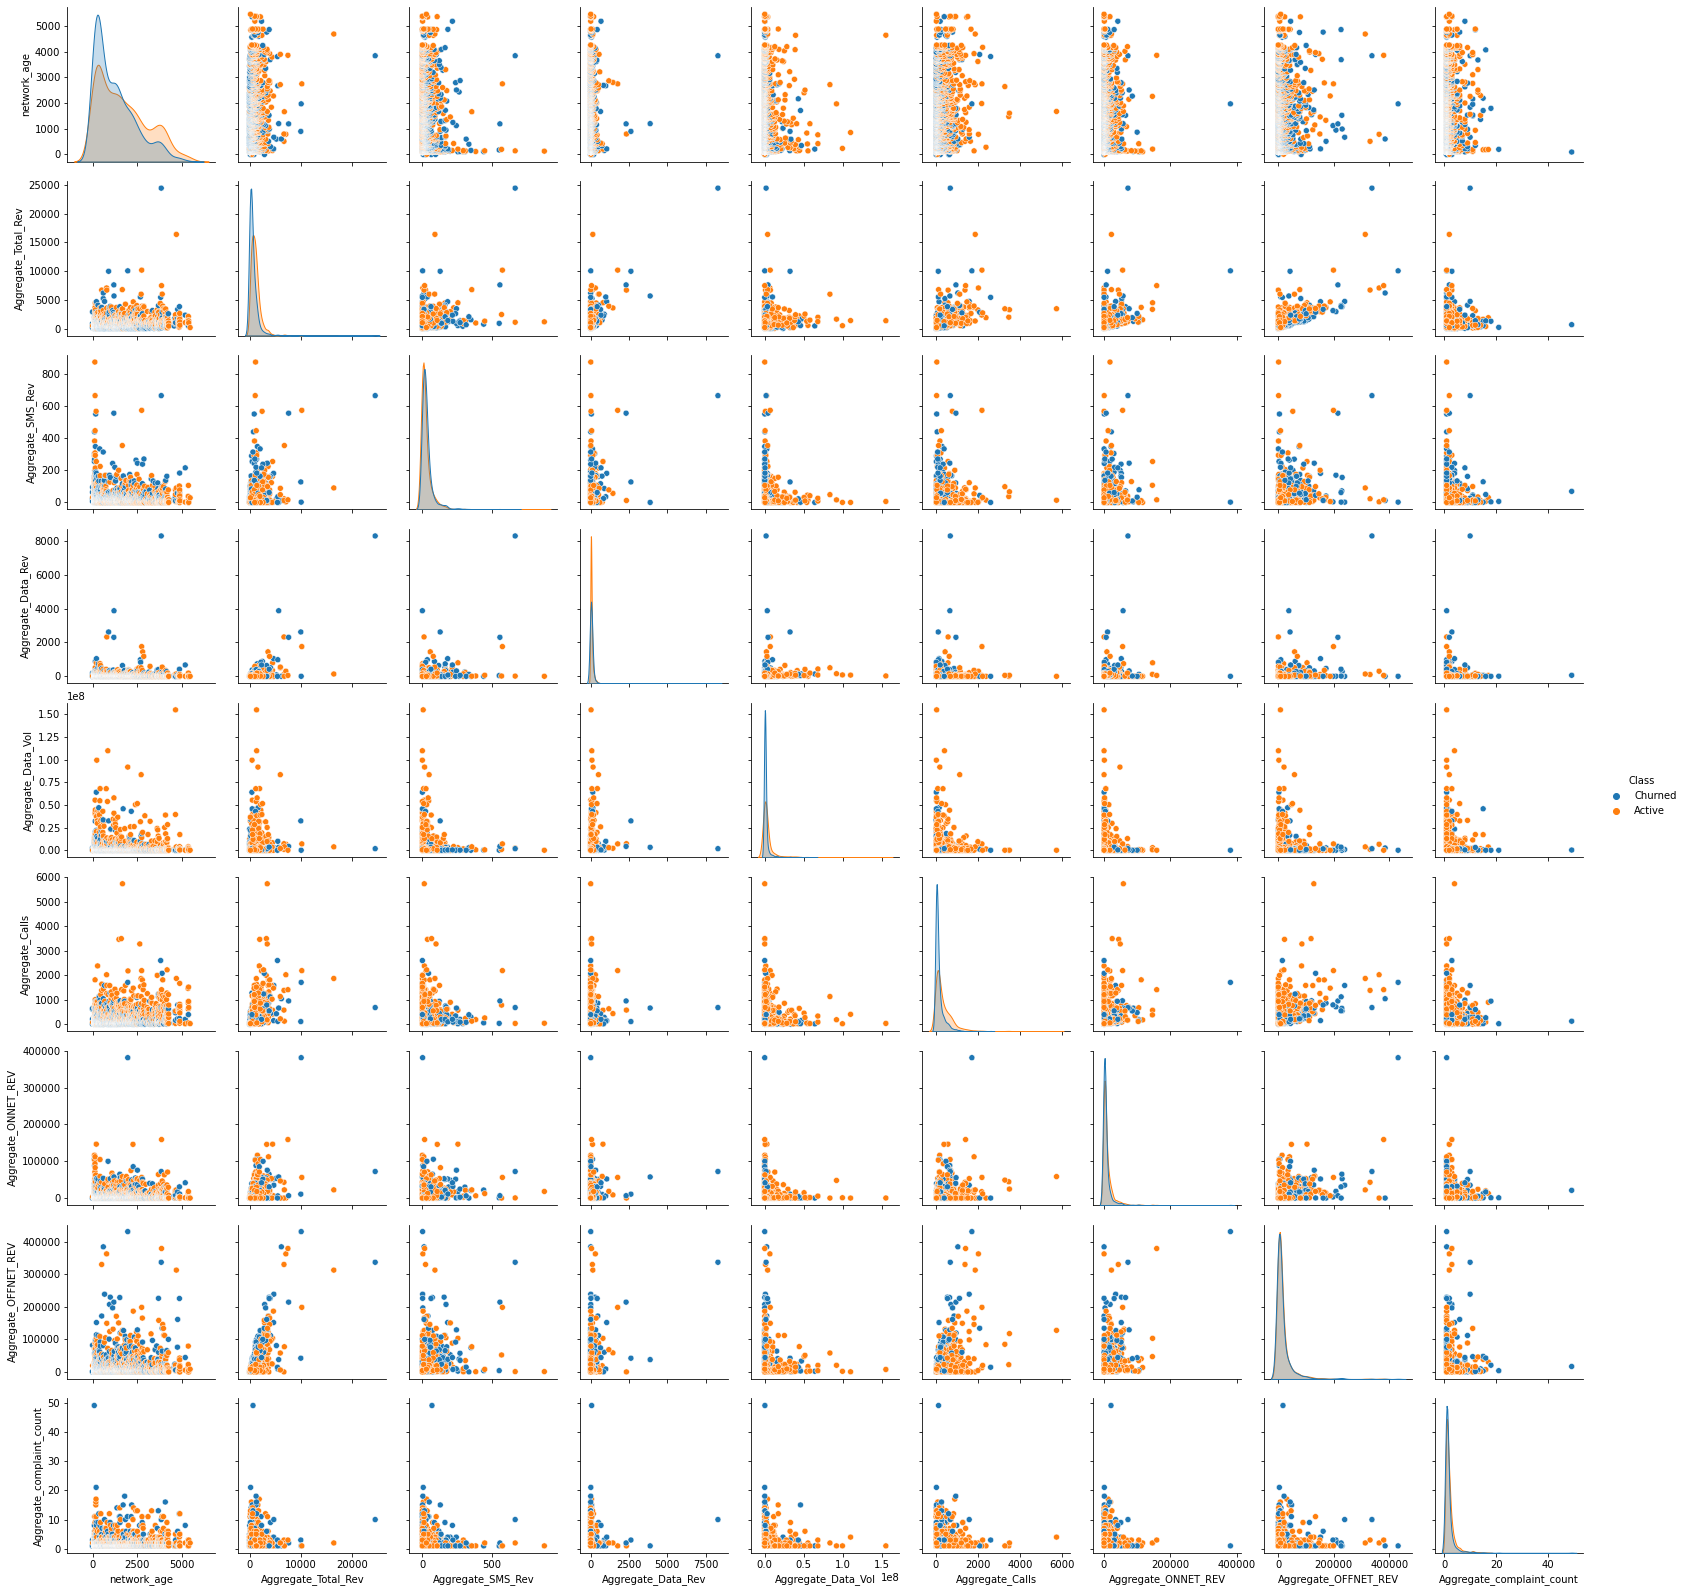

In [16]:
sns.pairplot(df_southAsianChurn,hue='Class')
plt.show()

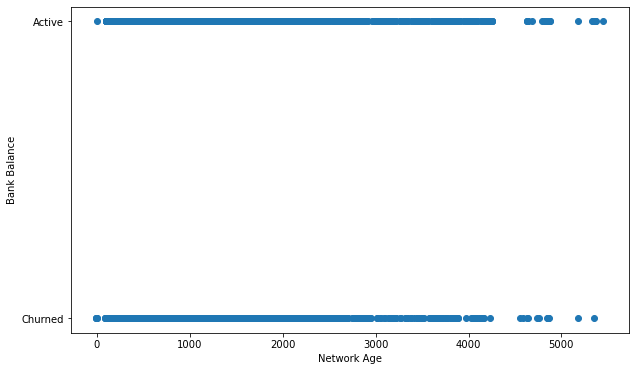

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_southAsianChurn["network_age"], df_southAsianChurn["Class"])
ax.set_xlabel("Network Age")
ax.set_ylabel("Bank Balance")
plt.show()

In [18]:
# Numerical values
df_southAsianChurn1 = df_southAsianChurn.select_dtypes(include=['int64','float64'])
df_southAsianChurn1.head()

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_Calls,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count
594,-8,485.7008,21.34,0.00,2.327901e+06,607,0,179,1
595,-5,857.1008,63.47,190.03,1.565901e+06,204,716,1240,1
596,-4,2898.8240,25.10,1.25,3.058533e+05,642,0,82221,1
597,-3,307.1204,6.25,75.00,3.450763e+05,9,477,1284,3
598,-2,130.5780,94.85,1.25,2.195300e+00,7,150,1121,1


In [36]:
# Categorical values
df_southAsianChurn1 = df_southAsianChurn.select_dtypes(include=['object'])
df_southAsianChurn1.head()

,aug_user_type,sep_user_type,aug_fav_a,sep_fav_a,Class
594,Other,Other,telenor,ufone,Churned
597,3G,3G,zong,ufone,Churned
599,3G,3G,mobilink,mobilink,Active
1012,2G,2G,ufone,ufone,Churned
1013,Other,Other,mobilink,mobilink,Churned


In [19]:
#To find null or NaN values in the dataset
df_southAsianChurn.isnull().sum()

network_age                    0
Aggregate_Total_Rev            0
Aggregate_SMS_Rev              0
Aggregate_Data_Rev             0
Aggregate_Data_Vol             0
Aggregate_Calls                0
Aggregate_ONNET_REV            0
Aggregate_OFFNET_REV           0
Aggregate_complaint_count      0
aug_user_type                245
sep_user_type                206
aug_fav_a                      1
sep_fav_a                      1
Class                          0
dtype: int64

In [20]:
# Replace the NaN or null values with most frequent value in the column
df_southAsianChurn =df_southAsianChurn.fillna(df_southAsianChurn.mode().iloc[0])
df_southAsianChurn.head()

,network_age,Aggregate_Total_Rev,Aggregate_SMS_Rev,Aggregate_Data_Rev,Aggregate_Data_Vol,Aggregate_Calls,Aggregate_ONNET_REV,Aggregate_OFFNET_REV,Aggregate_complaint_count,aug_user_type,sep_user_type,aug_fav_a,sep_fav_a,Class
594,-8,485.7008,21.34,0.00,2.327901e+06,607,0,179,1,Other,Other,telenor,ufone,Churned
595,-5,857.1008,63.47,190.03,1.565901e+06,204,716,1240,1,3G,3G,telenor,telenor,Churned
596,-4,2898.8240,25.10,1.25,3.058533e+05,642,0,82221,1,3G,3G,mobilink,warid,Churned
597,-3,307.1204,6.25,75.00,3.450763e+05,9,477,1284,3,3G,3G,zong,ufone,Churned
598,-2,130.5780,94.85,1.25,2.195300e+00,7,150,1121,1,Other,Other,ufone,ufone,Churned


In [21]:
df_southAsianChurn.isnull().sum()

network_age                  0
Aggregate_Total_Rev          0
Aggregate_SMS_Rev            0
Aggregate_Data_Rev           0
Aggregate_Data_Vol           0
Aggregate_Calls              0
Aggregate_ONNET_REV          0
Aggregate_OFFNET_REV         0
Aggregate_complaint_count    0
aug_user_type                0
sep_user_type                0
aug_fav_a                    0
sep_fav_a                    0
Class                        0
dtype: int64

<AxesSubplot:xlabel='network_age'>

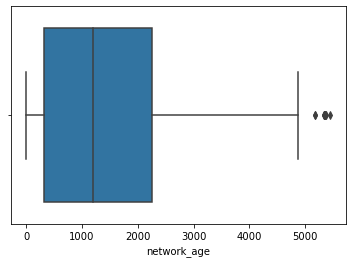

In [23]:
sns.boxplot(x=df_southAsianChurn['network_age'])

<AxesSubplot:xlabel='Aggregate_Total_Rev'>

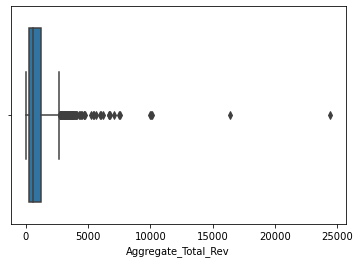

In [24]:
sns.boxplot(x=df_southAsianChurn['Aggregate_Total_Rev'])

<AxesSubplot:xlabel='Aggregate_SMS_Rev'>

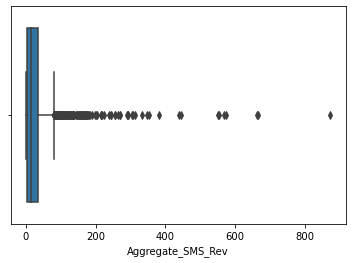

In [25]:
sns.boxplot(x=df_southAsianChurn['Aggregate_SMS_Rev'])

<AxesSubplot:xlabel='Aggregate_Data_Rev'>

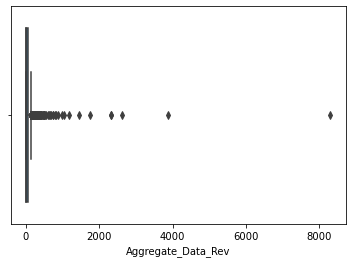

In [26]:
sns.boxplot(x=df_southAsianChurn['Aggregate_Data_Rev'])

<AxesSubplot:xlabel='Aggregate_Data_Vol'>

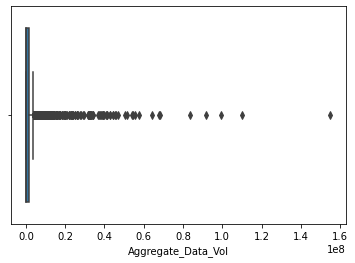

In [27]:
sns.boxplot(x=df_southAsianChurn['Aggregate_Data_Vol'])

<AxesSubplot:xlabel='Aggregate_Calls'>

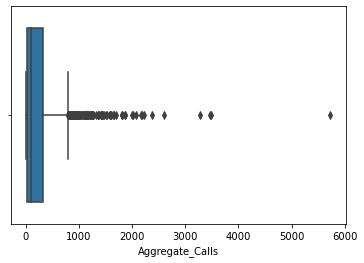

In [28]:
sns.boxplot(x=df_southAsianChurn['Aggregate_Calls'])

<AxesSubplot:xlabel='Aggregate_ONNET_REV'>

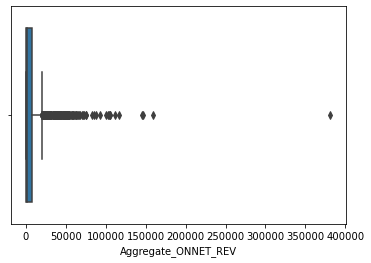

In [29]:
sns.boxplot(x=df_southAsianChurn['Aggregate_ONNET_REV'])

<AxesSubplot:xlabel='Aggregate_OFFNET_REV'>

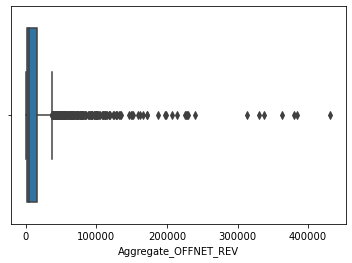

In [31]:
sns.boxplot(x=df_southAsianChurn['Aggregate_OFFNET_REV'])

<AxesSubplot:xlabel='Aggregate_complaint_count'>

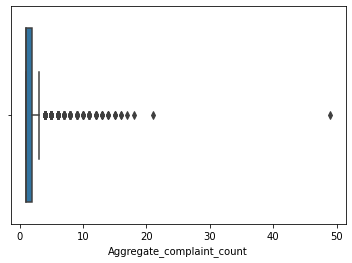

In [32]:
sns.boxplot(x=df_southAsianChurn['Aggregate_complaint_count'])

In [33]:
#Removing Outliers
Q1 = df_southAsianChurn.quantile(0.25)
Q3 = df_southAsianChurn.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

network_age                  1.923750e+03
Aggregate_Total_Rev          9.728954e+02
Aggregate_SMS_Rev            3.064000e+01
Aggregate_Data_Rev           5.250000e+01
Aggregate_Data_Vol           1.541829e+06
Aggregate_Calls              3.062500e+02
Aggregate_ONNET_REV          7.827000e+03
Aggregate_OFFNET_REV         1.435800e+04
Aggregate_complaint_count    1.000000e+00
dtype: float64


In [34]:
df_southAsianChurn = df_southAsianChurn[~((df_southAsianChurn < (Q1-1.5 * IQR)) |(df_southAsianChurn > (Q3 + 1.5 * IQR))).any(axis=1)]
df_southAsianChurn.shape

C:\Users\shrut\AppData\Local\Temp/ipykernel_29492/374757583.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_southAsianChurn = df_southAsianChurn[~((df_southAsianChurn < (Q1-1.5 * IQR)) |(df_southAsianChurn > (Q3 + 1.5 * IQR))).any(axis=1)]


(1086, 14)

In [35]:
df_southAsianChurn.shape

(1086, 14)